In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=data.iloc[:,[3,4]].values

In [4]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
 from sklearn.cluster import AffinityPropagation
    

In [6]:
af= AffinityPropagation(damping=0.5).fit(x)

In [14]:
af.predict(x)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 5, 7, 4, 6, 5, 7, 5, 7,
       4, 7, 5, 6, 5, 7, 5, 7, 5, 6, 4, 6, 5, 6, 4, 7, 5, 6, 5, 6, 5, 7,
       5, 6, 5, 7, 5, 7, 4, 6, 5, 6, 5, 7, 5, 6, 9, 7, 5, 7, 5, 6, 5, 6,
       5, 7, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       9, 8], dtype=int64)

In [21]:
cluster=af.predict(x)

In [15]:
cluster_centers_indices = af.cluster_centers_indices_


In [16]:
labels=af.labels_

In [17]:
n_clusters_ = len(cluster_centers_indices)

In [18]:
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 10


In [20]:
supervised=pd.DataFrame(data)


In [22]:
supervised['cluster_group']=cluster

In [23]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,8
196,197,Female,45,126,28,9
197,198,Male,32,126,74,8
198,199,Male,32,137,18,9


In [25]:
supervised.to_csv("afcluster.csv",index=False)

In [26]:
!pip install seaborn
import seaborn as sns


     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00


In [29]:
supervised.columns[3]

'Annual Income (k$)'

In [30]:
supervised.columns[4]

'Spending Score (1-100)'

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Affinity Propagation Clustering')

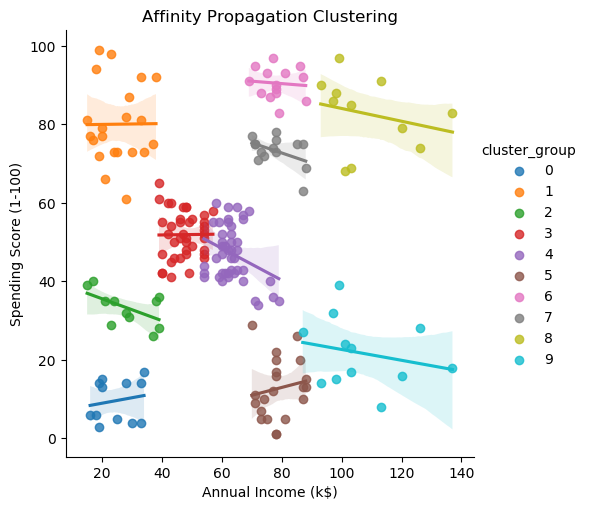

In [33]:
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],
                 hue=supervised.columns[5],legend=True,legend_out=True)
plt.title("Affinity Propagation Clustering")
